In [131]:
#!pip install scikit-learn
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

In [132]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from collections import Counter

In [133]:
# Carregar o dataset
df = pd.read_csv('dataset_tratado.csv')

features_numericas = [
    'popularity',       # popularidade do filme
    'budget',           # orçamento (de preferência em log)
    'runtime',          # duração do filme
    'vote_average',     # média dos votos
    'release_year',     # ano de lançamento
    'vote_count',
    'release_month',    # mês de lançamento
    # gêneros binarizados (one-hot encoding)
    'Action', 'Adventure', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy',
    'Horror', 'Mystery', 'Outros', 'Romance', 'Thriller', 'Science Fiction',
]

features_numericas += [col for col in df.columns if col.startswith('continent_')]
display(df.columns)

scaler = StandardScaler()
X_numerico = scaler.fit_transform(df[features_numericas])

Index(['popularity', 'budget', 'runtime', 'vote_average', 'vote_count',
       'release_year', 'release_month', 'Action', 'Adventure', 'Comedy',
       'Crime', 'Drama', 'Family', 'Fantasy', 'Horror', 'Mystery', 'Outros',
       'Romance', 'Science Fiction', 'Thriller', 'continent_Africa',
       'continent_America_do_Norte', 'continent_Asia', 'continent_Europa',
       'continent_Outros'],
      dtype='object')

In [134]:
resultados = []

for n_clusters in [5, 7, 9]:
    pipeline = make_pipeline(
        StandardScaler(),
        KMeans(n_clusters=n_clusters, random_state=87, n_init=10)
    )
    pipeline.fit(X_numerico)
    labels = pipeline.named_steps['kmeans'].labels_
    counts = pd.Series(labels).value_counts().sort_index()
    resultados.append(
        pd.DataFrame({
            'n_clusters': n_clusters,
            'cluster': counts.index,
            'qtd_itens': counts.values
        })
    )

df_clusters = pd.concat(resultados, ignore_index=True)
display(df_clusters)


,n_clusters,cluster,qtd_itens
0,5,0,1032
1,5,1,3192
2,5,2,1019
3,5,3,1655
4,5,4,566
5,7,0,1588
6,7,1,1416
7,7,2,2
8,7,3,1028
9,7,4,566


## Método do cotovelo para definir a melhor quantidade de K

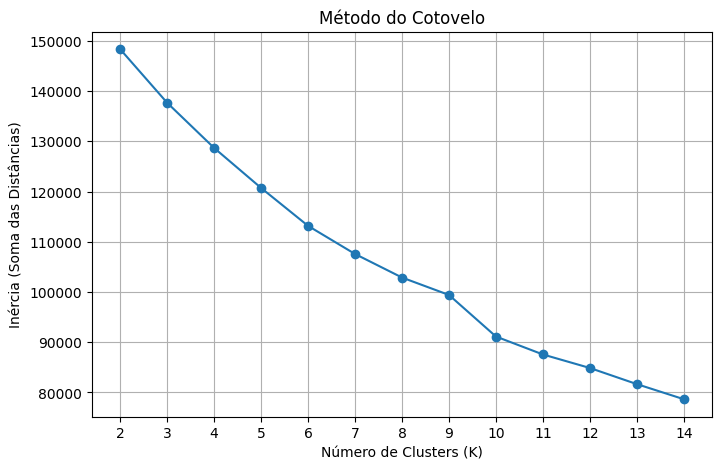

In [135]:
inertias = []
k_values = range(2, 15)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=87, n_init=10)
    kmeans.fit(StandardScaler().fit_transform(X_numerico))
    inertias.append(kmeans.inertia_)  # soma das distâncias aos centróides

# Plot do método do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia (Soma das Distâncias)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

C:\Users\thalyson\AppData\Local\Temp\ipykernel_9944\959608152.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y='qtd_itens', data=df_4_clusters, palette='viridis')


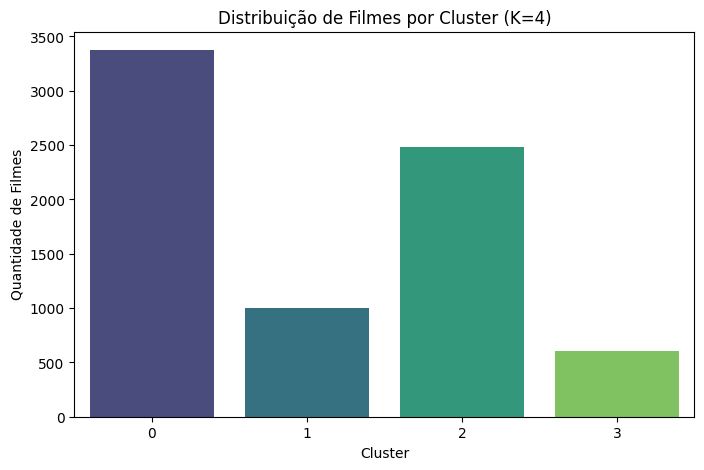

,popularity,budget,runtime,vote_average,release_year,vote_count,release_month,Action,Adventure,Comedy,...,Mystery,Outros,Romance,Thriller,Science Fiction,continent_Africa,continent_America_do_Norte,continent_Asia,continent_Europa,continent_Outros
cluster_4,,,,,,,,,,,,,,,,,,,,,
0,17.157484,15.932348,109.656889,6.544380,1999.817481,1087.748741,7.259556,0.066667,0.061926,0.463111,...,0.0,0.237630,0.327407,0.086815,0.015407,0.000296,0.999704,0.000000,0.000000,0.000000
1,12.597127,14.963001,107.574850,6.538277,2008.897206,405.187625,6.822355,0.145709,0.077844,0.392216,...,0.0,0.190619,0.156687,0.146707,0.042914,0.000000,0.000000,0.000000,1.000000,0.000000
2,22.739221,15.700429,99.280193,5.850409,2001.844605,1121.462560,6.430757,0.506844,0.168277,0.194847,...,0.0,0.045089,0.011675,0.549517,0.254026,0.000403,0.999195,0.000000,0.000403,0.000000
3,13.846317,15.070718,126.016584,6.782751,2008.933665,321.630182,6.877280,0.499171,0.102819,0.270315,...,0.0,0.182421,0.210614,0.291874,0.089552,0.000000,0.000000,0.943615,0.000000,0.056385


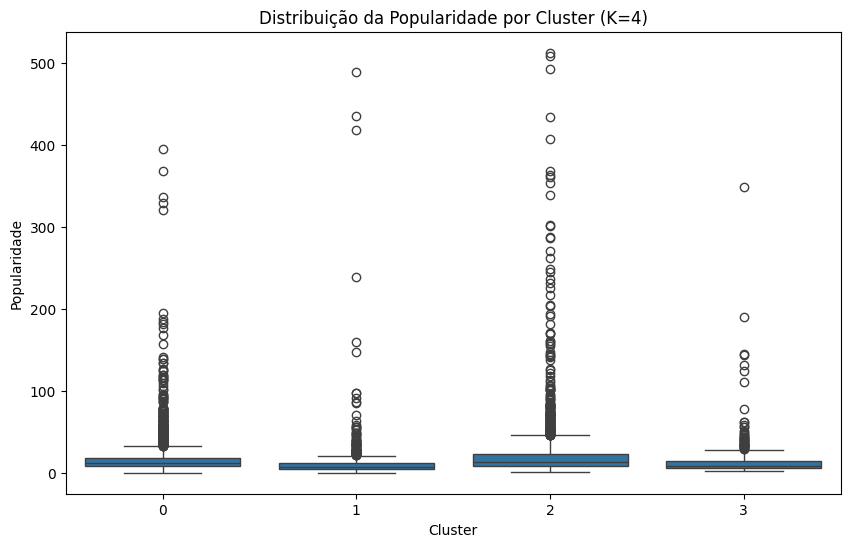

Cluster 0: 3375 filmes
Cluster 1: 1002 filmes
Cluster 2: 2484 filmes
Cluster 3: 603 filmes

Clusters com poucos filmes geralmente agrupam obras com características muito distintas ou extremas, como orçamentos muito altos/baixos, popularidade fora do padrão ou anos de lançamento atípicos. Já clusters numerosos reúnem filmes com características mais comuns no dataset, formando grupos mais homogêneos e numerosos.



In [136]:
# Adicionar os rótulos dos clusters ao dataframe original (caso ainda não tenha sido feito)
pipeline_4 = make_pipeline(StandardScaler(), KMeans(n_clusters=4, random_state=87, n_init=10))
pipeline_4.fit(X_numerico)
labels_4 = pipeline_4.named_steps['kmeans'].labels_
df['cluster_4'] = labels_4

# Criar df_4_clusters com a contagem de filmes por cluster


contagem_4 = Counter(labels_4)
df_4_clusters = pd.DataFrame({
    'n_clusters': [4] * len(contagem_4),
    'cluster': list(contagem_4.keys()),
    'qtd_itens': list(contagem_4.values())
}).sort_values('cluster')

# Visualizar a distribuição de filmes por cluster
plt.figure(figsize=(8, 5))
sns.barplot(x='cluster', y='qtd_itens', data=df_4_clusters, palette='viridis')
plt.title('Distribuição de Filmes por Cluster (K=4)')
plt.xlabel('Cluster')
plt.ylabel('Quantidade de Filmes')
plt.show()

# Analisar as médias das variáveis numéricas por cluster
cluster_means_4 = df.groupby('cluster_4')[features_numericas].mean()
display(cluster_means_4)

# Visualizar a distribuição de um atributo relevante por cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster_4', y='popularity', data=df)
plt.title('Distribuição da Popularidade por Cluster (K=4)')
plt.xlabel('Cluster')
plt.ylabel('Popularidade')
plt.show()

# Análise textual
for idx, row in df_4_clusters.iterrows():
    print(f"Cluster {row['cluster']}: {row['qtd_itens']} filmes")

print("""
Clusters com poucos filmes geralmente agrupam obras com características muito distintas ou extremas, como orçamentos muito altos/baixos, popularidade fora do padrão ou anos de lançamento atípicos. Já clusters numerosos reúnem filmes com características mais comuns no dataset, formando grupos mais homogêneos e numerosos.
""")

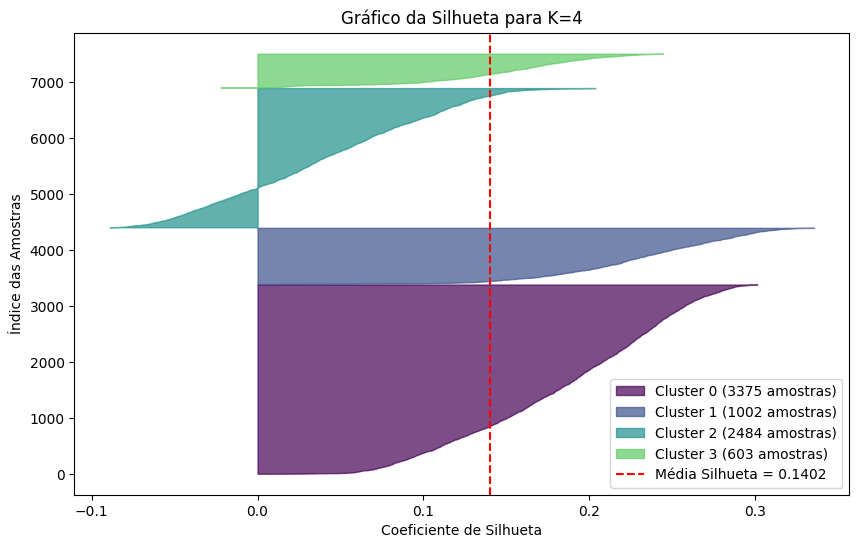

Média do Coeficiente de Silhueta para K=4: 0.1402


In [137]:
silhouette_vals = silhouette_samples(X_numerico, labels_4)
silhouette_avg = silhouette_score(X_numerico, labels_4)

plt.figure(figsize=(10, 6))
y_lower = 10

for i in range(4):  # para cada cluster
    ith_cluster_silhouette_values = silhouette_vals[labels_4 == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.viridis(float(i) / 4)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7,
                      label=f'Cluster {i} ({size_cluster_i} amostras)')

    y_lower = y_upper + 10  # espaço entre clusters

plt.axvline(x=silhouette_avg, color="red", linestyle="--", label=f'Média Silhueta = {silhouette_avg:.4f}')
plt.xlabel("Coeficiente de Silhueta")
plt.ylabel("Índice das Amostras")
plt.title("Gráfico da Silhueta para K=4")
plt.legend(loc='best')
plt.show()

print(f"Média do Coeficiente de Silhueta para K=4: {silhouette_avg:.4f}")